## 正则使用

In [145]:
import matplotlib
print(matplotlib.__path__)

['/usr/local/lib/python3.7/site-packages/matplotlib']


In [112]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [113]:
coordination_source.split('\n')

['',
 "{name:'兰州', geoCoord:[103.73, 36.03]},",
 "{name:'嘉峪关', geoCoord:[98.17, 39.47]},",
 "{name:'西宁', geoCoord:[101.74, 36.56]},",
 "{name:'成都', geoCoord:[104.06, 30.67]},",
 "{name:'石家庄', geoCoord:[114.48, 38.03]},",
 "{name:'拉萨', geoCoord:[102.73, 25.04]},",
 "{name:'贵阳', geoCoord:[106.71, 26.57]},",
 "{name:'武汉', geoCoord:[114.31, 30.52]},",
 "{name:'郑州', geoCoord:[113.65, 34.76]},",
 "{name:'济南', geoCoord:[117, 36.65]},",
 "{name:'南京', geoCoord:[118.78, 32.04]},",
 "{name:'合肥', geoCoord:[117.27, 31.86]},",
 "{name:'杭州', geoCoord:[120.19, 30.26]},",
 "{name:'南昌', geoCoord:[115.89, 28.68]},",
 "{name:'福州', geoCoord:[119.3, 26.08]},",
 "{name:'广州', geoCoord:[113.23, 23.16]},",
 "{name:'长沙', geoCoord:[113, 28.21]},",
 "//{name:'海口', geoCoord:[110.35, 20.02]},",
 "{name:'沈阳', geoCoord:[123.38, 41.8]},",
 "{name:'长春', geoCoord:[125.35, 43.88]},",
 "{name:'哈尔滨', geoCoord:[126.63, 45.75]},",
 "{name:'太原', geoCoord:[112.53, 37.87]},",
 "{name:'西安', geoCoord:[108.95, 34.27]},",
 "//{name:

In [114]:
import re

In [115]:
def reguler_match(coordination_source):
    city_location = {}
    for line in coordination_source.split('\n'):
        if not line: continue
        pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+\.?\d+),\s+(\d+\.?\d+)\]")
        city, long, lat = re.findall(pattern, line)[0]
        city_location[city] = (float(long), float(lat))
    return city_location

In [118]:
city_location = reguler_match(coordination_source)

In [119]:
import networkx as nx
import math

In [120]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))

In [121]:
%matplotlib inline

In [122]:
import matplotlib.pyplot as plt

In [123]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

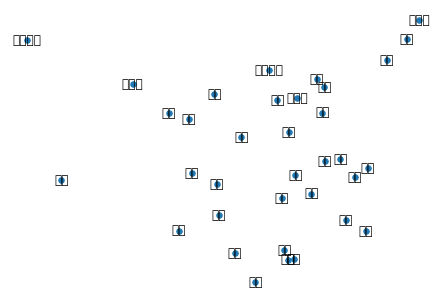

In [124]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [125]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [138]:
distence = 300

In [139]:
geo_distance(city_location['北京'], city_location['哈尔滨'])

1179.4354028957505

In [140]:
city_connection = {}

In [141]:
for city_start in city_location:
    connection = []
    for city_stop in city_location:
        if city_start == city_stop: continue
        if geo_distance(city_location[city_start], city_location[city_stop]) <= distence:
            connection.append(city_stop)
        else:
            continue
    city_connection[city_start] = connection

In [142]:
city_connection

{'兰州': ['西宁', '成都', '银川'],
 '嘉峪关': [],
 '西宁': ['兰州', '成都', '拉萨'],
 '成都': ['兰州', '西宁', '拉萨', '重庆'],
 '石家庄': ['郑州', '济南', '太原', '北京'],
 '拉萨': ['西宁', '成都'],
 '贵阳': ['重庆', '南宁'],
 '武汉': ['郑州', '南昌', '长沙'],
 '郑州': ['石家庄', '武汉', '长沙', '太原'],
 '济南': ['石家庄', '合肥', '北京', '天津'],
 '南京': ['合肥', '杭州'],
 '合肥': ['济南', '南京', '南昌'],
 '杭州': ['南京', '福州', '上海'],
 '南昌': ['武汉', '合肥'],
 '福州': ['杭州', '台湾'],
 '广州': ['长沙', '香港', '澳门'],
 '长沙': ['武汉', '郑州', '广州', '香港', '澳门'],
 '海口': ['南宁'],
 '沈阳': ['长春'],
 '长春': ['沈阳', '哈尔滨'],
 '哈尔滨': ['长春'],
 '太原': ['石家庄', '郑州', '呼和浩特'],
 '西安': [],
 '台湾': ['福州'],
 '北京': ['石家庄', '济南', '天津'],
 '上海': ['杭州'],
 '重庆': ['成都', '贵阳', '银川'],
 '天津': ['济南', '北京'],
 '呼和浩特': ['太原'],
 '南宁': ['贵阳', '海口'],
 '西藏': [],
 '银川': ['兰州', '重庆'],
 '乌鲁木齐': [],
 '香港': ['广州', '长沙', '澳门'],
 '澳门': ['广州', '长沙', '香港']}

In [143]:
city_with_road = nx.Graph(city_connection)

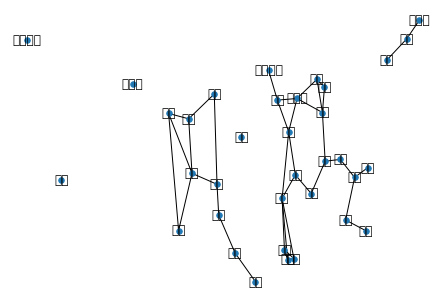

In [144]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [155]:
definition = {1: [2, 3],
              2: [1, 4],
              3: [1, 5],
              4: [2, 6],
              5: [3, 7]}

In [160]:
from collections import defaultdict
definition = defaultdict(list)
definition.update( {1: [2, 3],
              2: [1, 4],
              3: [1, 5],
              4: [2, 6],
              5: [3, 7]})

In [161]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]  # [1]
    
    seen = set()
     
    while visited:
        froninter = visited.pop() # 1
        
        if froninter in seen: continue
        
        for successor in graph[froninter]: #[2, 3]
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [163]:
bfs(definition, 1)


2
3
4
5
6
7


{1, 2, 3, 4, 5, 6, 7}

In [ ]:
def bfs(connection, f):
    paths = connection[f]
    path = []
    while 1:
        for n in connection[f]:
            if n in paths: continue
            paths = paths + [n] 
            
        
        
    
    